In [1]:
import sys
# !{sys.executable} -m pip install spacy
# !{sys.executable} -m pip install pyldavis
# !{sys.executable} -m spacy download en

In [2]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim import models
from gensim.models import LdaModel, CoherenceModel
from gensim.models.wrappers import LdaMallet
import pprint

# spacy for lemmatization
import spacy
from spacy.lang.en import English

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import pandas as pd
import numpy as np

In [3]:
reviews_datasets=pd.read_csv('D:\so-data\PostsChosenV1.csv' , index_col='Id' )
# reviews_datasets=reviews_datasets.head(1000)
# postTagsRawData = pd.read_csv('PostTagsV3.csv', chunksize=1000)
# postTagsRawData = pd.read_excel('PostsTags2.xlsx')
print(reviews_datasets.head(20))

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:1: DeprecationWarning: invalid escape sequence \s
<>:1: DeprecationWarning: invalid escape sequence \s
<ipython-input-3-4e304a545dff>:1: DeprecationWarning: invalid escape sequence \s
  reviews_datasets=pd.read_csv('D:\so-data\PostsChosenV1.csv' , index_col='Id' )


         AcceptedAnswerId  AnswerCount  \
Id                                       
1468404           1549052            3   
1583856           1634592           14   
1914947           1915407            4   
1961341           1961838            1   
2039387           2044192            4   
2583326           2583456            1   
2597198           2597594            1   
2604033           2604075           18   
2625210           2625240           19   
2855574           2858108            1   
2920069           4503153            1   
3155711           3156721            1   
3813715           3813880            2   
3819748           3819855            2   
4028356           4093283            1   
4105249           4105267            2   
4239115           4437224            1   
4278606           4285903            2   
4455224           4500915            1   
4517228           5799982            3   

                                                      Body  \
Id           

C:\tools\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
reviews_datasets.dropna()

# obody = reviews_datasets['Body']

# changed to append both title and body
reviews_datasets['CombinedTitleBody'] = reviews_datasets['Body']+reviews_datasets['Title']
obody = reviews_datasets['CombinedTitleBody']

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
reviews_datasets.head()
#print(obody)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,LastActivityDate,LastEditDate,LastEditorDisplayName,LastEditorUserId,OwnerUserId,ParentId,PostTypeId,Score,Tags,Title,ViewCount,CombinedTitleBody
Id,,,,,,,,,,,,,,,,,,,,
1468404,1549052,3,<p>Does mono touch allow you to do cross iPhon...,NaN,0,NaN,2009-09-23 20:42:43.883,2,2009-10-10 20:52:40.330,2009-09-23 20:45:37.153,NaN,25981,139096,0,1,3,<iphone><communication><xamarin.ios>,Cross iPhone communication using mono touch,1464,<p>Does mono touch allow you to do cross iPhon...
1583856,1634592,14,<p>After sitting through a session today on Mo...,2019-09-23 16:34:03.127,1,NaN,2009-10-18 02:47:39.653,91,2019-09-23 14:03:02.387,2012-03-07 16:08:46.430,user1228,0,142017,0,1,273,<c#><objective-c><mono><xamarin.ios>,How to decide between MonoTouch and Objective-C?,28366,<p>After sitting through a session today on Mo...
1914947,1915407,4,<p>What is the best approach to implement tabs...,NaN,0,NaN,2009-12-16 14:23:59.397,5,2019-05-21 10:06:27.997,2019-05-21 10:06:27.997,NaN,4751173,78101,0,1,6,<iphone><uiview><uiviewcontroller><xamarin.ios>,Web-like tabs for the iPhone,1053,<p>What is the best approach to implement tabs...
1961341,1961838,1,<p>How can I check internet access with MonoTo...,NaN,1,NaN,2009-12-25 15:38:21.420,2,2012-05-23 07:10:33.650,2009-12-25 18:33:38.633,NaN,30618,34155,0,1,14,<iphone><xamarin.ios>,Check for internet access with monotouch,5548,<p>How can I check internet access with MonoTo...
2039387,2044192,4,<p>I'm new to MonoTouch and iPhone development...,NaN,1,NaN,2010-01-11 01:12:49.940,2,2014-01-19 15:43:12.283,2014-01-19 15:43:12.283,NaN,578411,247706,0,1,14,<iphone><xamarin.ios>,Images in Interface Builder when using MonoTouch,4257,<p>I'm new to MonoTouch and iPhone development...


In [6]:
from nltk import ngrams
from nltk.tokenize import sent_tokenize
import nltk

import re
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from nltk.stem.snowball import SnowballStemmer

tokenizer = ToktokTokenizer()
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
import re

# Convert to list
data = reviews_datasets.Body.values.tolist()

# Remove new line characters
data = [re.sub(r'\s+', ' ', sent) for sent in data]

# Remove distracting single and double quotes
data = [re.sub("\'", "", sent) for sent in data]
data = [re.sub('\", "', '', sent) for sent in data]
data = [re.sub('\\"', '', sent) for sent in data]
data = [re.sub('\"', '', sent) for sent in data]
data = [re.sub('[\\:"]', '', sent) for sent in data]

# Remove web links
data = [re.sub(r'^https?:\/\/.*[\r\n]*', '', sent) for sent in data]

print(data[:3])

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['<p>Does mono touch allow you to do cross iPhone communication? (iPhones in the same room) If so, whats the API?</p> ', '<p>After sitting through a session today on Mono at a local .Net event, the use of MonoTouch was touched upon as an alternative for iPhone development. Being very comfortable in C# and .Net, it seems like an appealing option, despite some of the quirkiness of the Mono stack. However, since MonoTouch costs $400, Im somewhat torn on if this is the way to go for iPhone development.</p> <p>Anyone have an experience developing with MonoTouch and Objective-C, and if so is developing with MonoTouch that much simpler and quicker than learning Objective-C, and in turn worth the $400?</p> ', '<p>What is the best approach to implement tabs that look like web applications on the iPhone, like the screenshot below (notice the Checkin-Info-Friends tabs)? These are not part of the UIKit standard library, but seems to be very common lately.</p> <p>Ive spent considerable time develop

In [8]:
# Tokenize words and text clean up
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:3])

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['does', 'mono', 'touch', 'allow', 'you', 'to', 'do', 'cross', 'iphone', 'communication', 'iphones', 'in', 'the', 'same', 'room', 'if', 'so', 'whats', 'the', 'api'], ['after', 'sitting', 'through', 'session', 'today', 'on', 'mono', 'at', 'local', 'net', 'event', 'the', 'use', 'of', 'monotouch', 'was', 'touched', 'upon', 'as', 'an', 'alternative', 'for', 'iphone', 'development', 'being', 'very', 'comfortable', 'in', 'and', 'net', 'it', 'seems', 'like', 'an', 'appealing', 'option', 'despite', 'some', 'of', 'the', 'quirkiness', 'of', 'the', 'mono', 'stack', 'however', 'since', 'monotouch', 'costs', 'im', 'somewhat', 'torn', 'on', 'if', 'this', 'is', 'the', 'way', 'to', 'go', 'for', 'iphone', 'development', 'anyone', 'have', 'an', 'experience', 'developing', 'with', 'monotouch', 'and', 'objective', 'and', 'if', 'so', 'is', 'developing', 'with', 'monotouch', 'that', 'much', 'simpler', 'and', 'quicker', 'than', 'learning', 'objective', 'and', 'in', 'turn', 'worth', 'the'], ['what', 'is', 't

In [9]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=75) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=75)  


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[3]]])

['how', 'can', 'check', 'internet', 'access', 'with', 'monotouch', 'dont', 'care', 'if', 'the', 'internet', 'comes', 'from', 'wifi', 'or', 'the', 'cell', 'network', 'all', 'care', 'is', 'whether', 'there', 'is', 'internet', 'access', 'or', 'not']


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
spacy.load('en_core_web_sm')

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
#spacy.load('en_core_web_sm')

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
print(data_lemmatized[:2])

reviews_datasets['topics']=data_lemmatized
reviews_datasets['obody']=obody
reviews_datasets.head(20)
#reset option to default value

[['mono', 'touch', 'allow', 'cross', 'iphone', 'communication', 'iphone', 'room', 's', 'api'], ['sit', 'session', 'today', 'mono', 'local', 'net', 'event', 'use', 'monotouch', 'touch', 'alternative', 'iphone', 'development', 'comfortable', 'net', 'seem', 'appeal', 'option', 'quirkiness', 'mono', 'stack', 'however', 'monotouch', 'cost', 'm', 'somewhat', 'torn', 'way', 'go', 'iphone', 'development', 'experience', 'develop', 'monotouch', 'objective', 'develop', 'monotouch', 'much', 'simple', 'quick', 'learn', 'objective', 'turn', 'worth']]


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,LastActivityDate,LastEditDate,...,OwnerUserId,ParentId,PostTypeId,Score,Tags,Title,ViewCount,CombinedTitleBody,topics,obody
Id,,,,,,,,,,,,,,,,,,,,,
1468404,1549052,3,<p>Does mono touch allow you to do cross iPhon...,NaN,0,NaN,2009-09-23 20:42:43.883,2,2009-10-10 20:52:40.330,2009-09-23 20:45:37.153,...,139096,0,1,3,<iphone><communication><xamarin.ios>,Cross iPhone communication using mono touch,1464,<p>Does mono touch allow you to do cross iPhon...,"[mono, touch, allow, cross, iphone, communicat...",<p>Does mono touch allow you to do cross iPhon...
1583856,1634592,14,<p>After sitting through a session today on Mo...,2019-09-23 16:34:03.127,1,NaN,2009-10-18 02:47:39.653,91,2019-09-23 14:03:02.387,2012-03-07 16:08:46.430,...,142017,0,1,273,<c#><objective-c><mono><xamarin.ios>,How to decide between MonoTouch and Objective-C?,28366,<p>After sitting through a session today on Mo...,"[sit, session, today, mono, local, net, event,...",<p>After sitting through a session today on Mo...
1914947,1915407,4,<p>What is the best approach to implement tabs...,NaN,0,NaN,2009-12-16 14:23:59.397,5,2019-05-21 10:06:27.997,2019-05-21 10:06:27.997,...,78101,0,1,6,<iphone><uiview><uiviewcontroller><xamarin.ios>,Web-like tabs for the iPhone,1053,<p>What is the best approach to implement tabs...,"[good, approach, implement, tab, look, web, ap...",<p>What is the best approach to implement tabs...
1961341,1961838,1,<p>How can I check internet access with MonoTo...,NaN,1,NaN,2009-12-25 15:38:21.420,2,2012-05-23 07:10:33.650,2009-12-25 18:33:38.633,...,34155,0,1,14,<iphone><xamarin.ios>,Check for internet access with monotouch,5548,<p>How can I check internet access with MonoTo...,"[check, internet, access, monotouch, do, care,...",<p>How can I check internet access with MonoTo...
2039387,2044192,4,<p>I'm new to MonoTouch and iPhone development...,NaN,1,NaN,2010-01-11 01:12:49.940,2,2014-01-19 15:43:12.283,2014-01-19 15:43:12.283,...,247706,0,1,14,<iphone><xamarin.ios>,Images in Interface Builder when using MonoTouch,4257,<p>I'm new to MonoTouch and iPhone development...,"[m, new, monotouch, iphone, development, image...",<p>I'm new to MonoTouch and iPhone development...
2583326,2583456,1,"<p>This is not a really Programming Question, ...",NaN,2,NaN,2010-04-06 07:39:54.897,0,2010-04-06 14:38:38.320,2010-04-06 08:21:45.890,...,28004,0,1,1,<iphone><project><xamarin.ios><monodevelop>,Can't run MonoTouch App,849,"<p>This is not a really Programming Question, ...","[really, program, question, please_bear, relat...","<p>This is not a really Programming Question, ..."
2597198,2597594,1,"<p>This question is a duplicate of <a href=""ht...",NaN,0,NaN,2010-04-08 02:28:41.863,2,2010-04-08 04:34:30.573,2017-05-23 11:50:42.387,...,10116,0,1,2,<uikit><uiimage><xamarin.ios><pixel><unsafe>,Retrieving a pixel alpha value for a UIImage (...,2657,"<p>This question is a duplicate of <a href=""ht...","[question, duplicate, href, https, stackoverfl...","<p>This question is a duplicate of <a href=""ht..."
2604033,2604075,18,"<p>A recent post by <a href=""http://daringfire...",2012-12-05 12:52:02.217,6,NaN,2010-04-08 23:02:26.587,28,2017-11-07 07:51:04.140,2012-12-05 12:52:27.283,...,139096,0,1,155,<iphone><xamarin.ios>,Is MonoTouch now banned on the iPhone?,12385,"<p>A recent post by <a href=""http://daringfire...","[recent, post, href, http, daringfireball, net...","<p>A recent post by <a href=""http://daringfire..."
2625210,2625240,19,"<p>Is it possible to implement ""long press"" in...",NaN,2,NaN,2010-04-12 20:29:23.897,57,2019-12-17 06:36:51.870,2019-07-22 21:08:33.480,...,313632,0,1,121,<javascript><jquery><jquery-ui><jquery-mobile>...,Long Press in JavaScript?,174737,"<p>Is it possible to implement ""long press"" in...","[possible, implement, long, press, javascript,...","<p>Is it possible to implement ""long press"" in..."


In [16]:
reviews_datasets.to_csv("E:/so-data/output1.csv")

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
import os
from gensim.models.wrappers import LdaMallet

os.environ['MALLET_HOME'] = 'E:\\so-data\\mallet-2.0.8\\mallet-2.0.8'

mallet_path = 'E:\\so-data\\mallet-2.0.8\\mallet-2.0.8\\bin\\mallet'

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=30, id2word=id2word, optimize_interval=10, iterations=1500)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# gensim.models.LdaModel?

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Compute Coherence Score
# coherence_model_ldamallet = CoherenceModel(model=lda_mallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
# coherence_ldamallet = coherence_model_ldamallet.get_coherence()
# print('\nCoherence Score: ', coherence_ldamallet)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=15, step=5):
    """
    Compute c_v coherence for various number of topics
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
#model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=15, limit=45, step=5)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# #Show graph
# limit=45; start=15; step=5;
# x = range(start, limit, step)
# plt.plot(x, coherence_values)
# plt.xlabel("Num Topics")
# plt.ylabel("Coherence score")
# plt.legend(("coherence_values"), loc='best')
# plt.show()

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'coherence_values' is not defined

In [ ]:
# print(coherence_values)

In [25]:
def calculate_best_iterations(number_of_topics, number_of_iterations):
    print(number_of_iterations)
    lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus = corpus, num_topics= number_of_topics, id2word= id2word, optimize_interval=10, iterations= number_of_iterations)
    coherence_model_ldamallet = CoherenceModel(model=lda_mallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    iterations.append(number_of_iterations)
    iteration_based_coherence_values.append(coherence_model_ldamallet.get_coherence())

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


500
1000
1500
2000
2500
3000


NotImplementedError: cannot instantiate abstract base class

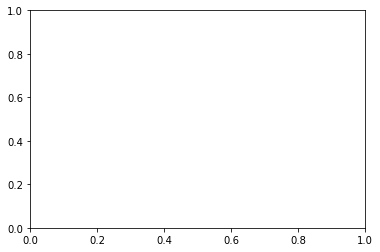

In [26]:
iterations = []
iteration_based_coherence_values = []

for i in [500,1000,1500,2000,2500, 3000]:
    calculate_best_iterations(35, i)

#Show graph
limit=3000; start=500; step=500;
x = range(start, limit, step)
plt.plot(x, iteration_based_coherence_values)
plt.xlabel("Num of iterations")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for i in iteration_based_coherence_values:
    print(i)

In [ ]:
#Show graph
limit=3000; start=500; step=500;
x = range(start, limit, step)
plt.plot(x, iteration_based_coherence_values)
plt.xlabel("Num of iterations")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()